In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
from datetime import datetime

In [2]:
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [3]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
google_data.head()


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-03-28,4.497262,4.581050,4.485611,4.503707,350830087
2005-03-29,4.451402,4.543370,4.414218,4.488090,259890496
2005-03-30,4.473217,4.498006,4.452146,4.477926,250378977
2005-03-31,4.474704,4.496519,4.403559,4.411244,271758815
2005-04-01,4.463053,4.535189,4.461814,4.505691,248206866


In [5]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5031.000000,5031.000000,5031.000000,5031.000000,5.031000e+03
mean,50.487501,51.000953,49.959392,50.466647,1.039161e+08
std,48.304618,48.815331,47.791940,48.276449,1.343772e+08
min,4.451402,4.496519,4.403559,4.411244,1.584340e+05
25%,13.512485,13.657255,13.378748,13.525128,2.616600e+07
50%,28.652750,28.858704,28.429422,28.700890,4.843200e+07
75%,68.406620,69.279979,67.264231,67.910596,1.273009e+08
max,207.473633,208.462496,204.027547,204.267279,1.650833e+09


In [6]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5031 entries, 2005-03-28 to 2025-03-24
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5031 non-null   float64
 1   (High, GOOG)    5031 non-null   float64
 2   (Low, GOOG)     5031 non-null   float64
 3   (Open, GOOG)    5031 non-null   float64
 4   (Volume, GOOG)  5031 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.8 KB


In [7]:
%matplotlib inline

In [8]:
plt.figure(figsize = (20, 15))
google_data['Close'].plot()
plt.xlabel("Years")
plt.ylabel("Close")
plt.title("Closing price of Google Data")

Text(0.5, 1.0, 'Closing price of Google Data')

<Figure size 2000x1500 with 0 Axes>

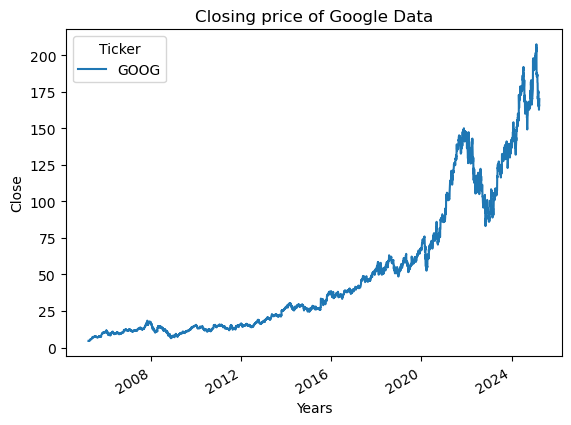

In [9]:
plt.show(close=None, block=None)

<Figure size 2000x1500 with 0 Axes>

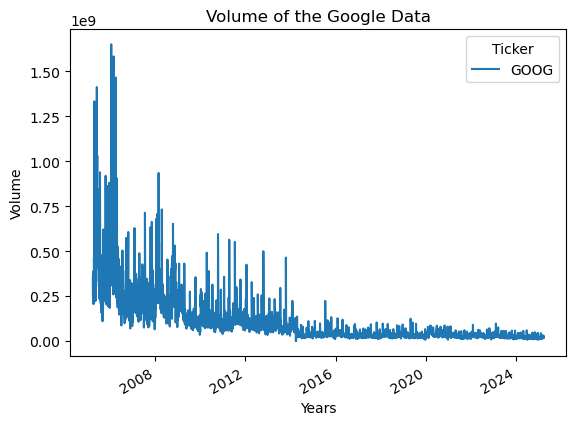

In [10]:
plt.figure(figsize = (20,15))
google_data['Volume'].plot()
plt.xlabel("Years")
plt.ylabel("Volume")
plt.title("Volume of the Google Data")
plt.show(close = None, block = None)

<Figure size 2000x1500 with 0 Axes>

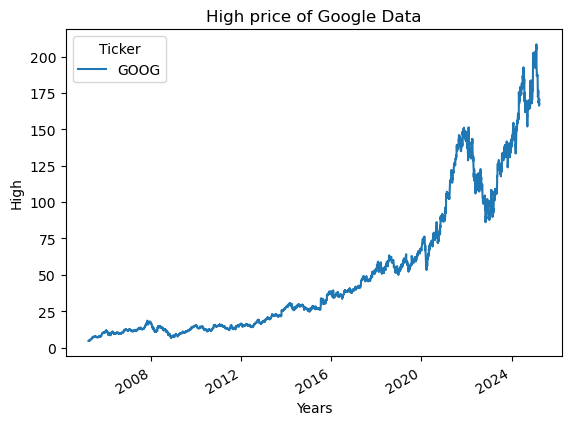

In [11]:
plt.figure(figsize = (20, 15))
google_data['High'].plot()
plt.xlabel("Years")
plt.ylabel("High")
plt.title("High price of Google Data")
plt.show(close = None, block = None)

In [12]:
sample_data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
sample_data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [13]:
sample_data.rolling(5).mean() 

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [14]:
for i in range(2005, 2026):
    print(i, list(google_data.index.year).count(i))

2005 195
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252
2025 55


In [15]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()

In [16]:
google_data['MA_for_250_days'][0:250].tail()

Date
2006-03-16        NaN
2006-03-17        NaN
2006-03-20        NaN
2006-03-21        NaN
2006-03-22    8.00591
Name: MA_for_250_days, dtype: float64

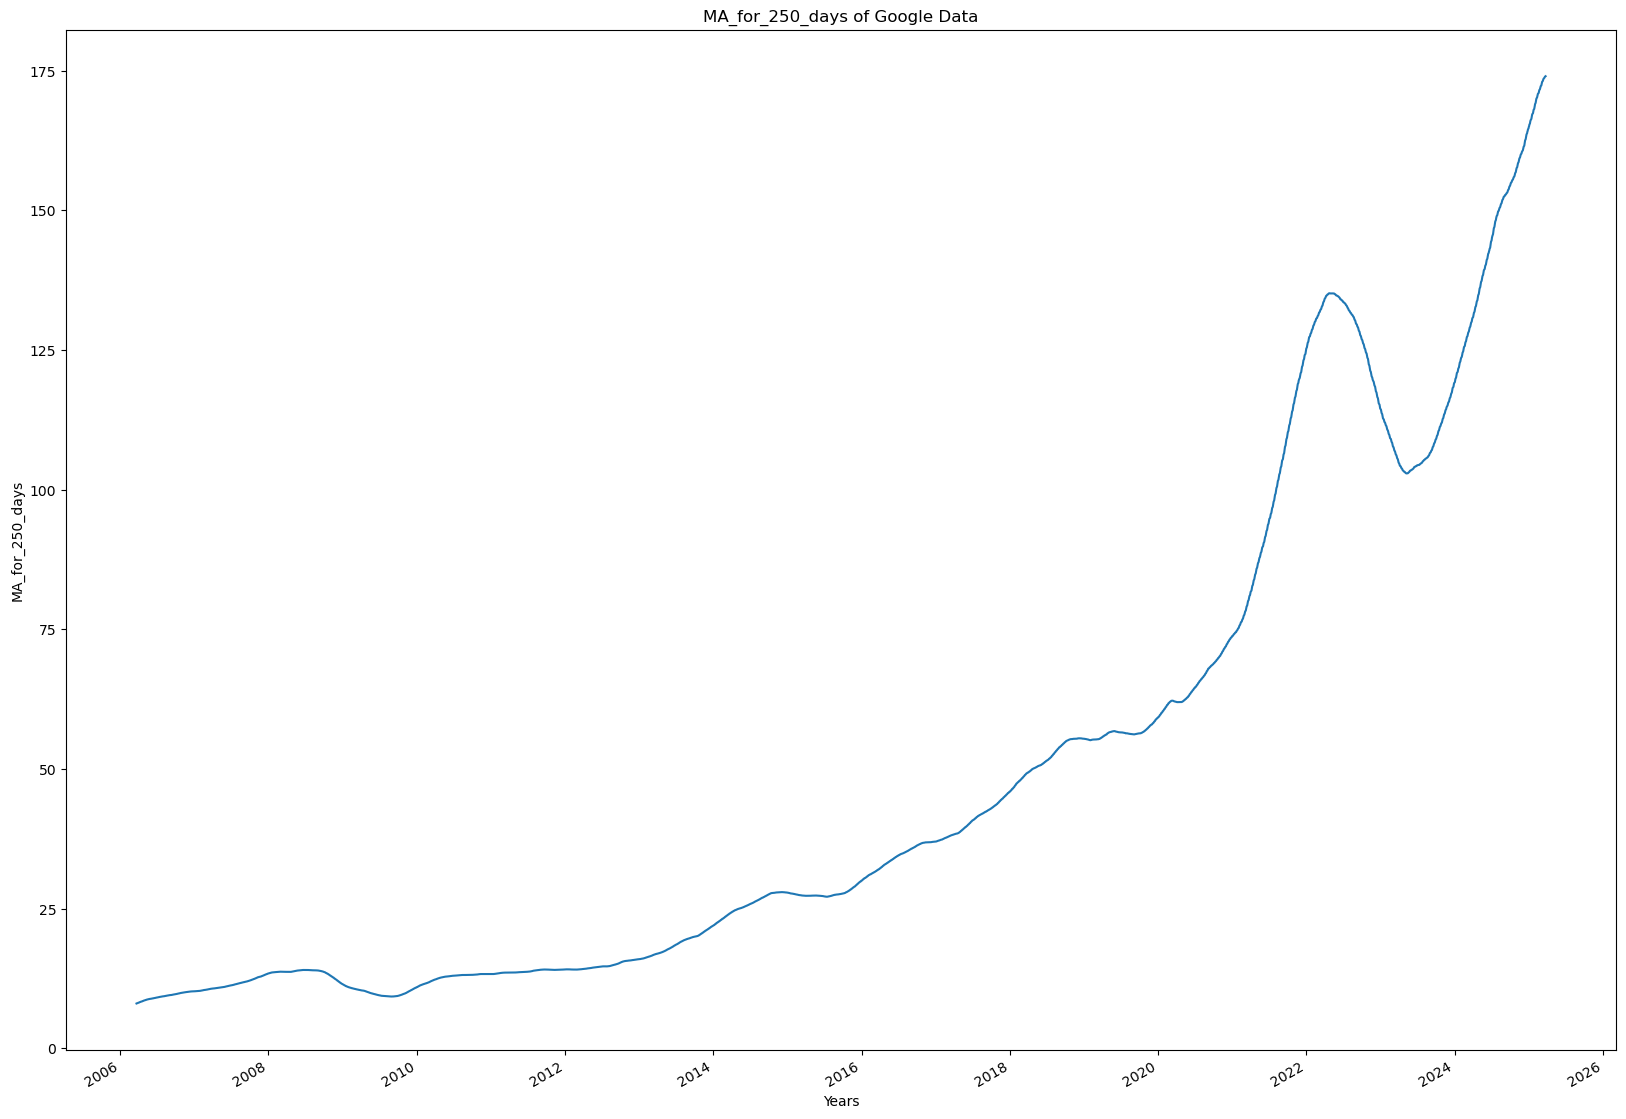

In [17]:
plt.figure(figsize = (20, 15))
google_data['MA_for_250_days'].plot()
plt.xlabel("Years")
plt.ylabel("MA_for_250_days")
plt.title("MA_for_250_days of Google Data")
plt.show(close = None, block = None)

<Figure size 2000x1500 with 0 Axes>

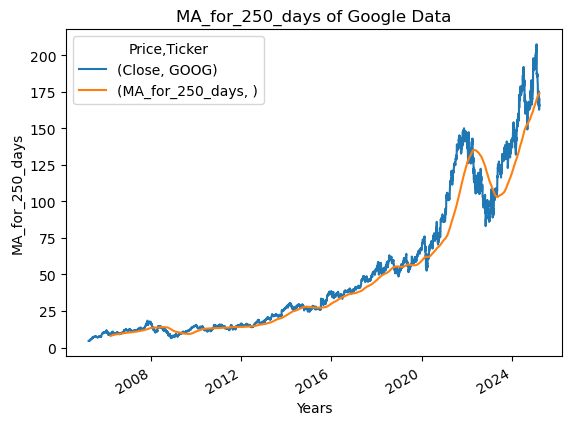

In [18]:
plt.figure(figsize = (20, 15))
google_data[['Close', 'MA_for_250_days']].plot()
plt.xlabel("Years")
plt.ylabel("MA_for_250_days")
plt.title("MA_for_250_days of Google Data")
plt.show(close = None, block = None)

In [19]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()

<Figure size 2000x1500 with 0 Axes>

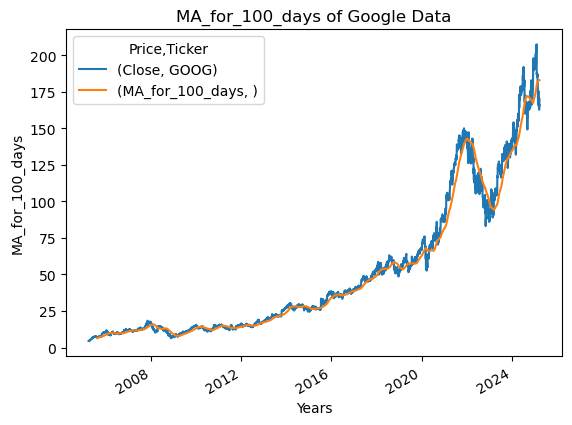

In [20]:
plt.figure(figsize = (20, 15))
google_data[['Close', 'MA_for_100_days']].plot()
plt.xlabel("Years")
plt.ylabel("MA_for_100_days")
plt.title("MA_for_100_days of Google Data")
plt.show(close = None, block = None)

<Figure size 2000x1500 with 0 Axes>

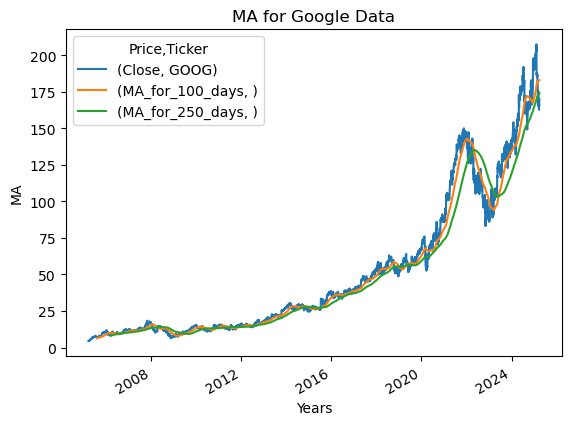

In [21]:
plt.figure(figsize = (20, 15))
google_data[['Close', 'MA_for_100_days', 'MA_for_250_days']].plot()
plt.xlabel("Years")
plt.ylabel("MA")
plt.title("MA for Google Data")
plt.show(close = None, block = None)

In [22]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data['percentage_change_cp'] 
google_data[['Close', 'percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-03-28,4.497262,NaN
2005-03-29,4.451402,-0.010197
2005-03-30,4.473217,0.004901
2005-03-31,4.474704,0.000332
2005-04-01,4.463053,-0.002604


<Figure size 2000x1500 with 0 Axes>

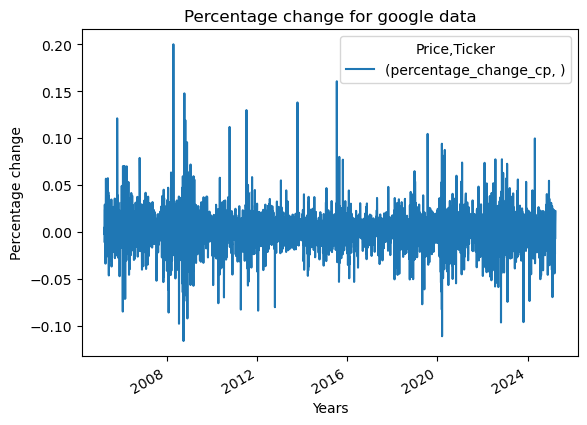

In [23]:
plt.figure(figsize = (20, 15))
google_data[['percentage_change_cp']].plot()
plt.xlabel("Years")
plt.ylabel("Percentage change")
plt.title("Percentage change for google data")
plt.show(close = None, block = None)

## Normalization


In [25]:
Closed_Price = google_data['Close']
max(Closed_Price.values), min(Closed_Price.values)

(array([207.47363281]), array([4.45140171]))

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(Closed_Price)
scaled_data

array([[2.25885675e-04],
       [0.00000000e+00],
       [1.07450416e-04],
       ...,
       [7.91039486e-01],
       [7.96950154e-01],
       [8.15076211e-01]])

In [27]:
len(scaled_data)

5031

In [28]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)

## Train and Test Splitting 

In [30]:
spliting_length = int(len(x_data)*0.7)
x_train = x_data[:spliting_length]
y_train = y_data[:spliting_length]

x_test = x_data[spliting_length:]
y_test = y_data[spliting_length:]

In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3451, 100, 1)
(3451, 1)
(1480, 100, 1)
(1480, 1)


## Building the Neural Network Model


In [33]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [34]:
model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\shaur\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [36]:
model.fit(x_train, y_train, batch_size = 1, epochs = 2)

Epoch 1/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 134s 37ms/step - loss: 2.1382e-04
Epoch 2/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 125s 36ms/step - loss: 6.4505e-05


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [38]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step


In [39]:
predictions

array([[0.2620312 ],
       [0.26475787],
       [0.26488093],
       ...,
       [0.7418716 ],
       [0.7414414 ],
       [0.74320036]], dtype=float32)

In [40]:
inv_prediction = scaler.inverse_transform(predictions)
inv_prediction

array([[ 57.64956 ],
       [ 58.203136],
       [ 58.22812 ],
       ...,
       [155.06783 ],
       [154.9805  ],
       [155.3376  ]], dtype=float32)

In [41]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 59.18915176],
       [ 58.4282608 ],
       [ 58.03860474],
       ...,
       [165.05000305],
       [166.25      ],
       [169.92999268]])

In [42]:
rmse = np.sqrt(np.mean((inv_prediction - inv_y_test) ** 2))
rmse

7.377110135374157

In [46]:
plotting_data = pd.DataFrame(
{
    'Original Test data': inv_y_test.reshape(-1),
    'predictions': inv_prediction.reshape(-1),
} ,
    index = google_data.index[spliting_length+100:]                            
)
plotting_data.head()

,Original Test data,predictions
Date,,
2019-05-06,59.189152,57.649559
2019-05-07,58.428261,58.203136
2019-05-08,58.038605,58.228119
2019-05-09,57.845016,57.892277
2019-05-10,57.939072,57.484177


<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

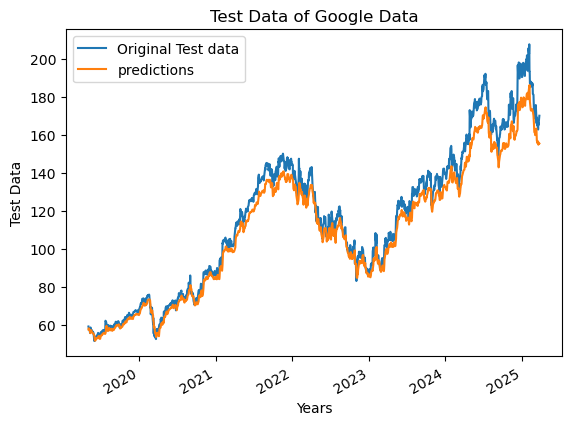

In [56]:
plt.figure(figsize = (15, 6))
plotting_data.plot()
plt.xlabel("Years")
plt.ylabel("Test Data")
plt.title("Test Data of Google Data")
plt.show(close = None, block = None) 

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

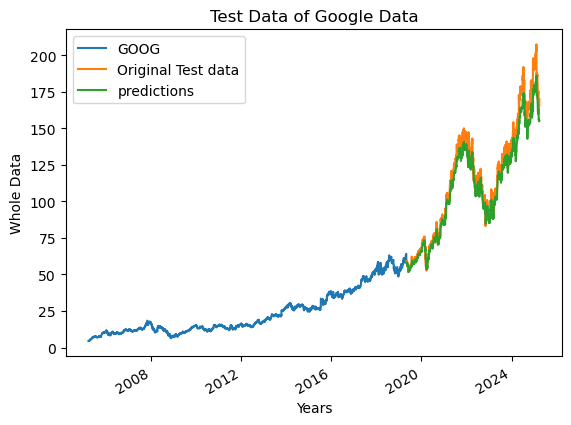

In [74]:
plt.figure(figsize = (15, 6))
pd.concat([Closed_Price[:spliting_length+100], plotting_data], axis = 0).plot()
plt.xlabel("Years")
plt.ylabel("Whole Data")
plt.title("Test Data of Google Data")
plt.show(close = None, block = None) 

In [76]:
model.save("Latest_stock_price_model.keras")